In [1]:
%config Completer.use_jedi = False
%matplotlib inline
import numpy as np
from IPython import display
from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

In [8]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 2, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=8.30000
h=0.01000, numerical limit=8.03000
h=0.00100, numerical limit=8.00300
h=0.00010, numerical limit=8.00030
h=0.00001, numerical limit=8.00003


In [3]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图。"""
    display.set_matplotlib_formats('svg')

我们定义 `set_figsize` 函数来设置图表大小。注意，这里我们直接使用 `d2l.plt`，因为导入语句 `from matplotlib import pyplot as plt` 已在前言中标记为保存到`d2l` 包中。


In [4]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小。"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

下面的`set_axes`函数用于设置由`matplotlib`生成图表的轴的属性。


In [5]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴。"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

通过这三个用于图形配置的函数，我们定义了 `plot` 函数来简洁地绘制多条曲线，因为我们需要在整个书中可视化许多曲线。


In [6]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点。"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果 `X` 有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or
                isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

现在我们可以[**绘制函数 $u = f(x)$ 及其在 $x=1$ 处的切线 $y = 2x - 3$**]，其中系数$2$是切线的斜率。

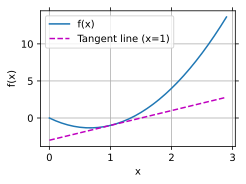

In [7]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])